In [1]:
import pandas as pd
import pyfolio as pf
import numpy as np
from scipy.stats import norm

C:\Users\edson\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# Leitura da planilha de risco e retorno e suas pastas
df_portfolio = pd.read_excel("dados/Risco_Retorno_Base.xlsx",sheet_name="Portfolios")
df_screener = pd.read_excel("dados/Risco_Retorno_Base.xlsx",sheet_name="Screener", header=1)
df_precos = pd.read_excel("dados/Risco_Retorno_Base.xlsx",sheet_name="PreLast",header=1)
df_volume = pd.read_excel("dados/Risco_Retorno_Base.xlsx",sheet_name="Volume",header=1)

In [3]:
# Identificar o período de interesse e filtrar os dados da aba histórico para o período desejado
data_inicio = pd.Timestamp('2019-12-31')
data_fim = pd.Timestamp('2023-03-31')
df_historico_periodo = df_precos.loc[(df_precos['Data'] >= data_inicio) & (df_precos['Data'] <= data_fim)]

In [16]:
# Separar as informações de cada carteira em um DataFrame separado
carteiras = list(df_portfolio.columns)
#carteiras.remove('Ativo')
carteiras_dfs = {}
for carteira in carteiras:
    ativos = list(df_portfolio[carteira].dropna())
    carteira_df = df_precos[ativos].copy()
    carteira_df = carteira_df.pct_change().dropna()
    carteira_df['Retorno'] = carteira_df.sum(axis=1)
    carteiras_dfs[carteira] = carteira_df


In [28]:
carteiras_dfs

{'Blue Chips':      VALE3.SA  PETR4.SA  ITUB4.SA  WEGE3.SA  BBDC4.SA  BPAC11.SA  SANB4.SA  \
 1    0.019325  0.017230  0.025482  0.016734  0.037047   0.002233  0.049724   
 2   -0.007362 -0.008143 -0.010518 -0.012770  0.000506   0.000655  0.026316   
 3   -0.005934  0.011823 -0.014882  0.002587 -0.017862  -0.011788 -0.055842   
 4    0.007275 -0.003895 -0.023199  0.007741 -0.017372   0.011632 -0.014410   
 5    0.000185 -0.006191 -0.016294 -0.037838 -0.015470  -0.006605 -0.013735   
 ..        ...       ...       ...       ...       ...        ...       ...   
 805 -0.001652  0.017113  0.017227  0.016786  0.018096   0.012917  0.008633   
 806  0.010568  0.017688  0.004657  0.004370 -0.001546   0.020723 -0.003566   
 807  0.014363  0.013141  0.009692  0.008702  0.005418  -0.008329  0.004295   
 808  0.016271  0.002929  0.027546  0.003115  0.030023   0.042520  0.006415   
 809 -0.018700 -0.021694  0.004874 -0.031295 -0.015695  -0.010574  0.014873   
 
      BBAS3.SA  ELET6.SA  ITSA4.SA  

In [17]:
# Calcular o retorno total de cada carteira no período usando os retornos diários
carteiras_retornos = {}
for carteira, df in carteiras_dfs.items():
    carteiras_retornos[carteira] = (df['Retorno'] + 1).prod() - 1

In [18]:
carteiras_retornos

{'Blue Chips': -0.9999999277361751,
 'Mid Caps': -1.0000000423559319,
 'Small Caps': -0.9996696968130623,
 'Micro Caps': -0.9999999987066884,
 'High Return': -0.996975578448219,
 'Low Return': -1.0,
 'High Volatility': -1.0,
 'Low Volatility': -0.9991746842631556,
 'High Liquidity': -0.999995346529688,
 'Low Liquidity': -1.0002679006163013,
 'High Beta': -1.0,
 'Market Beta': -0.9999992920145716,
 'Low Beta': -0.04075405018680234,
 'High Alpha': 0.37568171477010104,
 'Low Alpha': -1.0,
 'High Sharpe': -4.04456925789051,
 'Low Sharpe': -1.0,
 'High P/E': -1.0000000000064118,
 'Low P/E': -1.000890438280378,
 'High P/B': -0.9999999984136605,
 'Low P/B': -1.0000026624791216,
 'High Debt': -1.0000024894261874,
 'Low Debt': -0.999977296007971,
 'Banks': -1.0000010485924964}

In [19]:
# Selecionar a aba "Portfolio" e transformá-la em um dataframe
df_carteiras = df_portfolio.iloc[:, :len(df_portfolio.columns)]

In [20]:
# Criar um dicionário para armazenar as volatilidades anuais de cada carteira
volatilidades = {}

In [21]:
# Iterar sobre as colunas do dataframe para extrair o nome de cada carteira
for carteira in df_carteiras.columns:

    # Selecionar as colunas que correspondem aos ativos da carteira na aba "Histórico"
    ativos = df_portfolio[carteira].dropna()
    df_ativos = df_precos[ativos]

    # Calcular o retorno diário para cada ativo
    retorno_diario = df_ativos.pct_change()

    # Calcular o retorno diário da carteira como a média ponderada dos retornos diários dos ativos
    peso = 1 / len(ativos)
    retorno_carteira_diario = retorno_diario.dot(np.repeat(peso, len(ativos)))

    # Calcular a volatilidade diária para cada carteira como o desvio padrão dos retornos diários
    volatilidade_diaria = retorno_carteira_diario.std()

    # Calcular a volatilidade anual para cada carteira multiplicando a volatilidade diária por raiz quadrada do número de dias de negociação por ano (geralmente 252)
    volatilidade_anual = volatilidade_diaria * np.sqrt(252)

    # Adicionar a volatilidade anual da carteira ao dicionário
    volatilidades[carteira] = volatilidade_anual

In [22]:
volatilidades

{'Blue Chips': 0.3010082526441863,
 'Mid Caps': 0.2993017453977891,
 'Small Caps': 0.25773464662568446,
 'Micro Caps': 0.3201250023932869,
 'High Return': 0.2893811426208532,
 'Low Return': 0.3945696504579564,
 'High Volatility': 0.3917152234880955,
 'Low Volatility': 0.1669205754230334,
 'High Liquidity': 0.3391664143124982,
 'Low Liquidity': 0.22951673989164814,
 'High Beta': 0.45551993478401887,
 'Market Beta': 0.28563643154638185,
 'Low Beta': 0.14713015234019744,
 'High Alpha': 0.35328436175340583,
 'Low Alpha': 0.35829507079747247,
 'High Sharpe': 0.28530185391999185,
 'Low Sharpe': 0.3576141243333528,
 'High P/E': 0.32377386823136434,
 'Low P/E': 0.30274417667958586,
 'High P/B': 0.33964126114438514,
 'Low P/B': 0.3131615703807708,
 'High Debt': 0.31847273385848507,
 'Low Debt': 0.23477951442033576,
 'Banks': 0.2684140950298288}

In [23]:
# calcular a volatilidade do BVSP
bvsp_historico_df = df_precos['.BVSP'] # seleciona a coluna BVSP
log_returns = np.log(bvsp_historico_df / bvsp_historico_df.shift(1))
volatility = log_returns.std() * np.sqrt(252) # assume 252 dias úteis por ano


In [24]:
volatility

0.3057034176900046

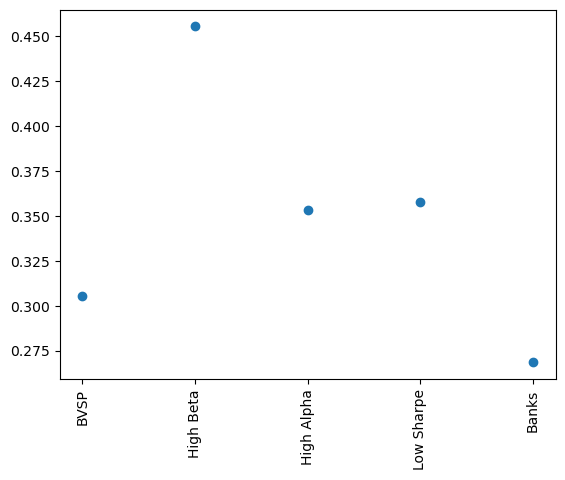

In [27]:
import matplotlib.pyplot as plt

dic = {'BVSP': 0.30570341769000463,
 'High Beta': 0.45551993478401887,
 'High Alpha': 0.35328436175340583,
 'Low Sharpe': 0.3576141243333528,
 'Banks': 0.2684140950298288}

x = list(dic.keys())
y = list(dic.values())

fig, ax = plt.subplots()
ax.scatter(x, y)

plt.xticks(rotation=90)

plt.show()


In [35]:
# Separar as informações de cada carteira em um DataFrame separado
carteiras = list(df_portfolio.columns)
#carteiras.remove('Ativo')
carteiras_dfs = {}
for carteira in carteiras:
    ativos = list(df_portfolio[carteira].dropna())
    carteira_df = df_precos[ativos].copy()
    carteira_df = carteira_df.pct_change().dropna()
    carteira_df['Retorno'] = carteira_df.sum(axis=1)
    carteiras_dfs[carteira] = carteira_df

